In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#random.seed(42)
#np.random.seed(42)
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns

In [101]:
data1 = pd.read_csv("study1/study1data.csv", index_col=0)
data2 = pd.read_csv("study2/study2data.csv", index_col=0)

In [102]:
data1.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'consent', 'ID', 'age', 'gender', 'polAffil',
       'polAlign_1', 'educ', 'langother', 'englishprof', 'Q1_1', 'Q2_1',
       'Q4_1', 'Q5_1', 'Q3_1', 'Q6_1', 'Q1_2_3', 'Q1_2_4', 'Q2_2_1', 'Q2_2_2',
       'Q4_2_1', 'Q4_2_2', 'Q5_2_1', 'Q5_2_2', 'Q3_2_1', 'Q3_2_2', 'Q6_2_1',
       'Q6_2_2', 'PROLIFIC_PID', 'Condition', 'survey', 'Q1_midpoint',
       'Q2_midpoint', 'Q3_midpoint', 'Q4_midpoint', 'Q5_midpoint',
       'Q6_midpoint', 'Q1_width', 'Q2_width', 'Q3_width', 'Q4_width',
       'Q5_width', 'Q6_width', 'width_median', 'width_mean'],
      dtype='object')

In [103]:
cols = ["Q1_1","Q2_1", "Q4_1", "Q5_1","Q1_midpoint","Q2_midpoint","Q4_midpoint", "Q5_midpoint", "polAffil"]
data = pd.concat([data1[cols],data2[cols]])

In [21]:
data

,Q1_1,Q2_1,Q4_1,Q5_1,Q1_midpoint,Q2_midpoint,Q4_midpoint,Q5_midpoint,polAffil
0,0.25,0.46,1.00,0.75,0.1450,0.5200,0.6900,0.5550,Republican
1,0.95,0.26,0.77,0.78,0.5100,0.8300,0.5700,0.7000,Republican
2,0.03,0.00,0.77,0.04,0.4900,0.4850,0.5100,0.4950,Republican
3,0.18,0.82,0.31,0.03,0.6800,0.3950,0.2750,0.5800,Republican
4,0.56,0.42,0.81,0.58,0.6700,0.6650,0.5800,0.6250,Republican
...,...,...,...,...,...,...,...,...,...
325,0.83,1.00,0.85,0.79,0.4425,0.4600,0.5125,0.4675,Republican
326,0.00,0.00,1.00,0.00,0.4500,0.6125,0.8375,0.5125,Republican
327,0.26,0.75,0.90,0.01,0.6150,0.6225,0.4775,0.6275,Republican
328,0.00,0.31,1.00,0.84,0.4850,0.5000,0.5400,0.4525,Republican


# Average

In [ ]:
N_samp = 50
N_exp = 10000

J_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}
B_AVG = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}

for i in tqdm(range(1,N_samp+1)):

    judgement_AbsE = []
    belief_AbsE = []
    judgement_SE = []
    belief_SE = []

    for exp in range(N_exp):
        
        J_Q = []
        B_Q = []
        for Qnum in ["1", "2", "4", "5"]:
            true_mean = data["Q{}_1".format(Qnum)].mean()
            J_sample = np.random.choice(data["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data["Q{}_midpoint".format(Qnum)].values,i)
            
            J_E_Q = true_mean-J_sample.mean()
            B_E_Q = true_mean-B_sample.mean()
            J_Q.append(J_E_Q)
            B_Q.append(B_E_Q)
        
        #J_E = np.mean(J_Q)
        #B_E = np.mean(B_Q)
        judgement_AbsE.append(np.mean([np.abs(j) for j in J_Q]))
        belief_AbsE.append(np.mean([np.abs(j) for j in B_Q]))
        judgement_SE.append(np.mean([j**2 for j in J_Q]))
        belief_SE.append(np.mean([j**2 for j in B_Q]))
    
    # mean absolute error
    J_MAE = np.mean(judgement_AbsE)
    B_MAE = np.mean(belief_AbsE)
    J_AVG["MAE"][str(i)] = J_MAE
    B_AVG["MAE"][str(i)] = B_MAE
    
    # mean squared error
    J_MSE = np.mean(judgement_SE)
    B_MSE = np.mean(belief_SE)
    J_AVG["MSE"][str(i)] = J_MSE 
    B_AVG["MSE"][str(i)] = B_MSE

    # root mean squared error
    J_RMSE = np.sqrt(np.mean(judgement_SE))
    B_RMSE = np.sqrt(np.mean(belief_SE))
    J_AVG["RMSE"][str(i)] = J_RMSE
    B_AVG["RMSE"][str(i)] = B_RMSE

            

In [11]:
with open('J_AVG.pkl', 'wb') as f:
    pickle.dump(J_AVG, f)

with open('B_AVG.pkl', 'wb') as f:
    pickle.dump(B_AVG, f)

In [9]:
with open('J_AVG.pkl', 'rb') as f:
    J_AVG = pickle.load(f)

with open('B_AVG.pkl', 'rb') as f:
    B_AVG = pickle.load(f)

Text(0.5, 1.0, 'Average errors')

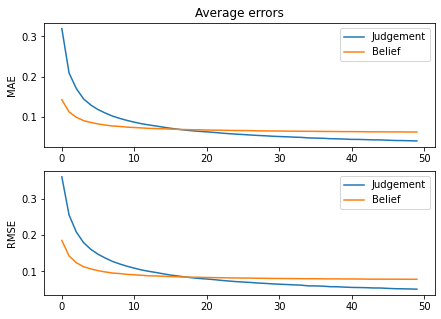

In [10]:
fig, ax = plt.subplots(2,1,figsize=(7,5))
for i, error_metric in enumerate(["MAE","RMSE"]):
    J_avg = list(J_AVG[error_metric].values())

    B_avg = list(B_AVG[error_metric].values())

    ax[i].plot(np.arange(50),J_avg, label="Judgement")
    ax[i].plot(np.arange(50),B_avg, label="Belief")
    #ax[i].scatter(np.arange(50),J_avg,s=10)
    #ax[i].scatter(np.arange(50),B_avg,s=10)
    ax[i].set_ylabel(error_metric)
    ax[i].legend()
ax[0].set_title("Average errors")

#plt.savefig("average.pdf")

## average but sampling from biased sample(s)

In [17]:

N_samp = 50
N_exp = 10000

J_AVG_RBIAS = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}
B_AVG_RBIAS = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}

for i in tqdm(range(1,N_samp+1)):

    judgement_AbsE = []
    belief_AbsE = []
    judgement_SE = []
    belief_SE = []

    for exp in range(N_exp):
        
        J_Q = []
        B_Q = []
        for Qnum in ["1", "2", "4", "5"]:
            true_mean = data["Q{}_1".format(Qnum)].mean()
            
            J_sample = np.random.choice(data[data.polAffil=="Republican"]["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data[data.polAffil=="Republican"]["Q{}_midpoint".format(Qnum)].values,i)
            
            J_E_Q = true_mean-J_sample.mean()
            B_E_Q = true_mean-B_sample.mean()
            J_Q.append(J_E_Q)
            B_Q.append(B_E_Q)
        
        #J_E = np.mean(J_Q)
        #B_E = np.mean(B_Q)
        judgement_AbsE.append(np.mean([np.abs(j) for j in J_Q]))
        belief_AbsE.append(np.mean([np.abs(j) for j in B_Q]))
        judgement_SE.append(np.mean([j**2 for j in J_Q]))
        belief_SE.append(np.mean([j**2 for j in B_Q]))
    
    # mean absolute error
    J_MAE = np.mean(judgement_AbsE)
    B_MAE = np.mean(belief_AbsE)
    J_AVG_RBIAS["MAE"][str(i)] = J_MAE
    B_AVG_RBIAS["MAE"][str(i)] = B_MAE
    
    # mean squared error
    J_MSE = np.mean(judgement_SE)
    B_MSE = np.mean(belief_SE)
    J_AVG_RBIAS["MSE"][str(i)] = J_MSE 
    B_AVG_RBIAS["MSE"][str(i)] = B_MSE

    # root mean squared error
    J_RMSE = np.sqrt(np.mean(judgement_SE))
    B_RMSE = np.sqrt(np.mean(belief_SE))
    J_AVG_RBIAS["RMSE"][str(i)] = J_RMSE
    B_AVG_RBIAS["RMSE"][str(i)] = B_RMSE

100%|██████████| 50/50 [42:28<00:00, 50.97s/it]


In [18]:
with open('J_AVG_RBIAS.pkl', 'wb') as f:
    pickle.dump(J_AVG_RBIAS, f)

with open('B_AVG_RBIAS.pkl', 'wb') as f:
    pickle.dump(B_AVG_RBIAS, f)

In [19]:

N_samp = 50
N_exp = 10000

J_AVG_BBIAS = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}
B_AVG_BBIAS = {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]}

for i in tqdm(range(1,N_samp+1)):

    judgement_AbsE = []
    belief_AbsE = []
    judgement_SE = []
    belief_SE = []

    for exp in range(N_exp):
        
        J_Q = []
        B_Q = []
        for Qnum in ["1", "2", "4", "5"]:
            true_mean = data["Q{}_1".format(Qnum)].mean()
            J_sample = np.random.choice(data[data.polAffil=="Democrat"]["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data[data.polAffil=="Democrat"]["Q{}_midpoint".format(Qnum)].values,i)
            
            J_E_Q = true_mean-J_sample.mean()
            B_E_Q = true_mean-B_sample.mean()
            J_Q.append(J_E_Q)
            B_Q.append(B_E_Q)
        
        #J_E = np.mean(J_Q)
        #B_E = np.mean(B_Q)
        judgement_AbsE.append(np.mean([np.abs(j) for j in J_Q]))
        belief_AbsE.append(np.mean([np.abs(j) for j in B_Q]))
        judgement_SE.append(np.mean([j**2 for j in J_Q]))
        belief_SE.append(np.mean([j**2 for j in B_Q]))
    
    # mean absolute error
    J_MAE = np.mean(judgement_AbsE)
    B_MAE = np.mean(belief_AbsE)
    J_AVG_BBIAS["MAE"][str(i)] = J_MAE
    B_AVG_BBIAS["MAE"][str(i)] = B_MAE
    
    # mean squared error
    J_MSE = np.mean(judgement_SE)
    B_MSE = np.mean(belief_SE)
    J_AVG_BBIAS["MSE"][str(i)] = J_MSE 
    B_AVG_BBIAS["MSE"][str(i)] = B_MSE

    # root mean squared error
    J_RMSE = np.sqrt(np.mean(judgement_SE))
    B_RMSE = np.sqrt(np.mean(belief_SE))
    J_AVG_BBIAS["RMSE"][str(i)] = J_RMSE
    B_AVG_BBIAS["RMSE"][str(i)] = B_RMSE

100%|██████████| 50/50 [45:38<00:00, 54.77s/it]


In [20]:
with open('J_AVG_BBIAS.pkl', 'wb') as f:
    pickle.dump(J_AVG_BBIAS, f)

with open('B_AVG_BBIAS.pkl', 'wb') as f:
    pickle.dump(B_AVG_BBIAS, f)

# Per sentence

In [11]:

N_samp = 150
N_exp = 10000

J_results = {Q: {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]} for Q in ["1", "2", "4", "5"]}
B_results = {Q: {err: {str(s): 0.0 for s in range(1,N_samp+1)} for err in ["MAE", "MSE", "RMSE"]} for Q in ["1", "2", "4", "5"]}

for i in tqdm(range(1,N_samp+1)):
    
    for Qnum in ["1", "2", "4", "5"]:
        true_mean = data["Q{}_1".format(Qnum)].mean()

        judgement_E = []
        belief_E = []
        judgement_AbsE = []
        belief_AbsE = []
        judgement_SE = []
        belief_SE = []

        for exp in range(N_exp):
            J_sample = np.random.choice(data["Q{}_1".format(Qnum)].values,i)
            B_sample = np.random.choice(data["Q{}_midpoint".format(Qnum)].values,i)


            #J_E = true_mean-J_sample.mean()
            #B_E = true_mean-B_sample.mean()
            #judgement_E.append(J_E)
            #belief_E.append(B_E)

            J_AbsE = np.abs(true_mean-J_sample.mean())
            B_AbsE = np.abs(true_mean-B_sample.mean())
            judgement_AbsE.append(J_AbsE)
            belief_AbsE.append(B_AbsE)

            J_SE = (true_mean-J_sample.mean())**2
            B_SE = (true_mean-B_sample.mean())**2
            judgement_SE.append(J_SE)
            belief_SE.append(B_SE)

        # mean difference
        #J_ME = np.mean(judgement_E)
        #B_ME = np.mean(belief_E)
        #J_results[Qnum]["ME"][str(i)] = J_ME
        #B_results[Qnum]["ME"][str(i)] = B_ME

        
        # mean abolute error
        J_MAE = np.mean(judgement_AbsE)
        B_MAE = np.mean(belief_AbsE)
        J_results[Qnum]["MAE"][str(i)] = J_MAE
        B_results[Qnum]["MAE"][str(i)] = B_MAE
        
        # mean squared error
        J_MSE = np.mean(judgement_SE)
        B_MSE = np.mean(belief_SE)
        J_results[Qnum]["MSE"][str(i)] = J_MSE
        B_results[Qnum]["MSE"][str(i)] = B_MSE
        
        # root mean squared error
        J_RMSE = np.sqrt(np.mean(judgement_SE))
        B_RMSE = np.sqrt(np.mean(belief_SE))
        J_results[Qnum]["RMSE"][str(i)] = J_RMSE
        B_results[Qnum]["RMSE"][str(i)] = B_RMSE




100%|██████████| 150/150 [12:28<00:00,  4.99s/it]


In [12]:
with open('J_results.pkl', 'wb') as f:
    pickle.dump(J_results, f)

with open('B_results.pkl', 'wb') as f:
    pickle.dump(B_results, f)

# loading and plotting

In [2]:
with open('J_AVG.pkl', 'rb') as f:
    J_AVG = pickle.load(f)

with open('B_AVG.pkl', 'rb') as f:
    B_AVG = pickle.load(f)


with open('J_results.pkl', 'rb') as f:
    J_results = pickle.load(f)

with open('B_results.pkl', 'rb') as f:
    B_results = pickle.load(f)


with open('J_AVG_BBIAS.pkl', 'rb') as f:
    J_AVG_DBIAS = pickle.load(f)

with open('B_AVG_BBIAS.pkl', 'rb') as f:
    B_AVG_DBIAS = pickle.load(f)


with open('J_AVG_RBIAS.pkl', 'rb') as f:
    J_AVG_RBIAS = pickle.load(f)

with open('B_AVG_RBIAS.pkl', 'rb') as f:
    B_AVG_RBIAS = pickle.load(f)


In [5]:
sns.set_palette("binary")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16)
plt.rc('legend', fontsize=14) 
plt.rc('figure', titlesize=18)

palette = sns.color_palette("binary_r",5)

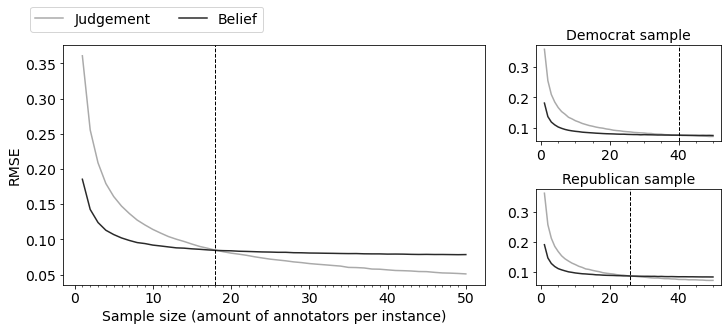

In [100]:

fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot2grid((2, 3), (0, 0),colspan=2,rowspan=2)

ax2 = plt.subplot2grid((2, 3), (0, 2), colspan=1,rowspan=1)
ax3 = plt.subplot2grid((2, 3), (1, 2), colspan=1,rowspan=1)

plt.tight_layout()

ax1.plot(np.arange(1,51),list(J_AVG["RMSE"].values()), label="Judgement",c=palette[3])
ax1.plot(np.arange(1,51),list(B_AVG["RMSE"].values()), label="Belief",c=palette[0])
ax1.axvline(x=18,c="black", linestyle="--", lw=1)
ax1.set_xticks(np.arange(0,51,1), minor=True)
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Sample size (amount of annotators per instance)")
#ax1.legend()

ax2.plot(np.arange(1,51),list(J_AVG_DBIAS["RMSE"].values()), label="Judgement",c=palette[3])
ax2.plot(np.arange(1,51),list(B_AVG_DBIAS["RMSE"].values()), label="Belief",c=palette[0])
ax2.axvline(x=40,c="black", linestyle="--", lw=1)
ax2.set_xticks(np.arange(0,51,5), minor=True)
ax2.set_title("Democrat sample",fontsize=14)
#ax2.legend()

ax3.plot(np.arange(1,51),list(J_AVG_RBIAS["RMSE"].values()), label="Judgement",c=palette[3])
ax3.plot(np.arange(1,51),list(B_AVG_RBIAS["RMSE"].values()), label="Belief",c=palette[0])
ax3.axvline(x=26,c="black", linestyle="--", lw=1)
ax3.set_xticks(np.arange(0,51,5), minor=True)
ax3.set_title("Republican sample",fontsize=14)
#ax3.set_xlabel("Sample size")
#ax3.legend()

plt.legend(bbox_to_anchor=(-2.1, 2.9), loc="upper center", 
    borderaxespad=0.,frameon=True,ncol=2)


fig.subplots_adjust(hspace=0.5)

plt.savefig("avg_rmse_vs_size.pdf",bbox_inches='tight')

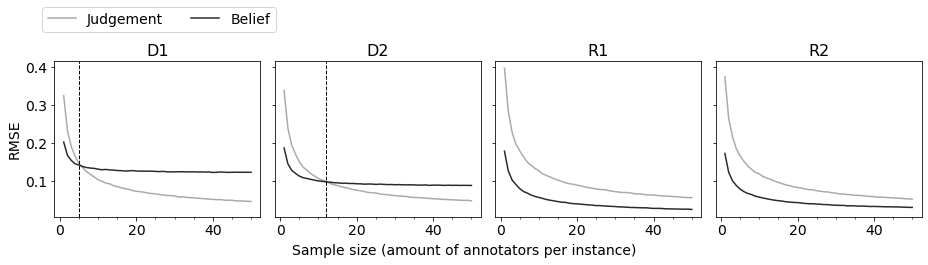

In [13]:
fig, ax = plt.subplots(1,4, figsize=(13,3), sharey=True, sharex=True)

for indel,(s,slab) in enumerate(list(zip(["4", "5","1","2"],["D1", "D2", "R1", "R2"]))):
    ax[indel].plot(np.arange(1,51),list(J_results[s]["RMSE"].values())[:50], label="Judgement",c=palette[3])
    ax[indel].plot(np.arange(1,51),list(B_results[s]["RMSE"].values())[:50], label="Belief",c=palette[0])
    ax[indel].set_xticks(np.arange(0,51,5), minor=True)
    ax[indel].set_title(slab)

ax[0].set_ylabel("RMSE")

ax[0].axvline(x=5,c="black", linestyle="--", lw=1)
ax[1].axvline(x=12,c="black", linestyle="--", lw=1)

plt.tight_layout()
plt.legend(bbox_to_anchor=(-2.7, 1.35), loc="upper center", 
    borderaxespad=0.,frameon=True,ncol=2)

fig.text(x=0.5,y=-0.03, s="Sample size (amount of annotators per instance)",horizontalalignment='center',fontsize=14)

#plt.savefig("instance_rmse_vs_size.pdf", bbox_inches='tight')